**In this Notebook, I am getting familiar with the [iTrace dataset](https://zenodo.org/records/7306199) (download the *.nc* file).**

This dataset is not a direct output from isotope-enabled GCMs. Instead, it has been generated through data fusion and bias correction techniques based on GCM outputs. In other words, post-processing methods were applied to the model outputs to bring the simulations closer to observational data. This dataset is 1870–2017 at a monthly scale.

First, we import useful libraries and read the netCTF4 file with xarray to get a Dataset object. 

In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np
import plotly as px
import cartopy.crs as ccrs

fn = '../data/iTrace/PrecipOxygenIso_mainlandCHINA_1870to2017_v2.nc'

In [2]:
with xr.open_dataset(filename_or_obj=fn, engine='netcdf4',decode_times=False) as file:
    print(file)
    # We need the data array containing variable d180p
    d18Op = file.d18Op

<xarray.Dataset> Size: 79MB
Dimensions:  (time: 1776, lon: 87, lat: 64)
Coordinates:
  * lat      (lat) float64 512B 53.1 52.44 51.83 51.24 ... 21.63 21.12 20.61
  * lon      (lon) float64 696B 73.74 74.4 75.06 75.72 ... 131.4 132.7 134.1
  * time     (time) float64 14kB 1.0 2.0 3.0 ... 1.774e+03 1.775e+03 1.776e+03
Data variables:
    d18Op    (time, lon, lat) float64 79MB ...


In [3]:
# if needed, the DataArray can be converted in a pandas series.
d18Op_series = d18Op.to_series() # convert to multi-index series 
d18Op_series = d18Op_series.loc[~ d18Op_series.isna()] # drop nan values 

Now, we can try to plot the data by setting different spatio-temporal ranges.

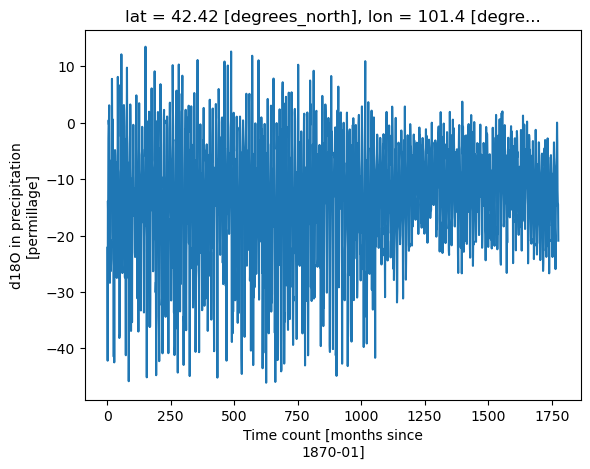

In [4]:
testloc_d18Op = d18Op.isel(lat=20,lon=42)
testloc_d18Op.plot()
plt.show()

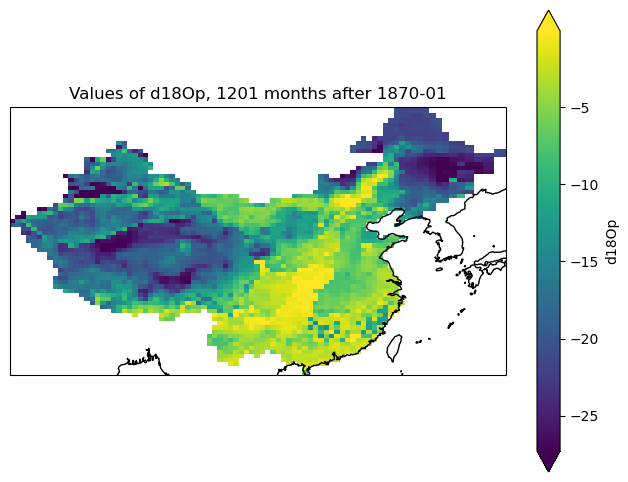

In [5]:
# Plot with cartopy
da_sel = d18Op.transpose('time','lat','lon').isel(time=1200)
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={"projection": ccrs.PlateCarree()})
da_sel.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),  # tells cartopy the data is in lon/lat coords
    cmap="viridis",
    cbar_kwargs={"label": da_sel.name},
    robust=True
)

# Add map features
ax.coastlines()
ax.set_title(f"Values of d18Op, {str(int(da_sel.time.values))} months after 1870-01")
plt.show()

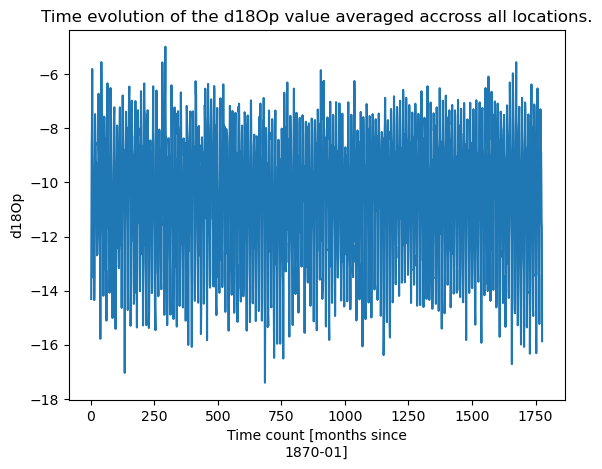

In [6]:
# Mean across all lat/lon
global_mean = d18Op.mean(dim=("lat", "lon"))
global_mean.plot.line(x="time")
plt.title('Time evolution of the d18Op value averaged accross all locations.')
plt.show()